<a href="https://colab.research.google.com/github/KHN70/CN6005-Ai-Weekly-Portfolio/blob/main/Explainable_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 2900.19
R² Score: 0.45


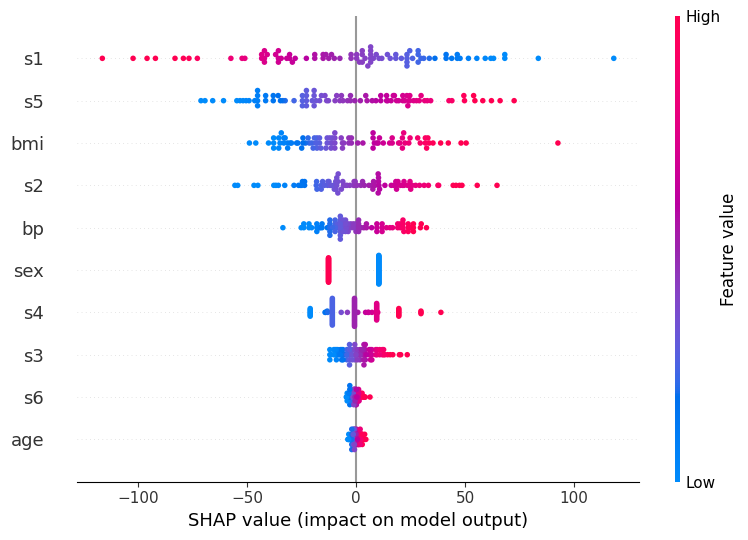

In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")
# Split into training and testing sets
X_train, X_test, y_train, y_test =
     train_test_split(X, y, test_size=0.2, random_state=42)
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
# SHAP explanation
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)
# SHAP summary plot
shap.summary_plot(shap_values, X_test)

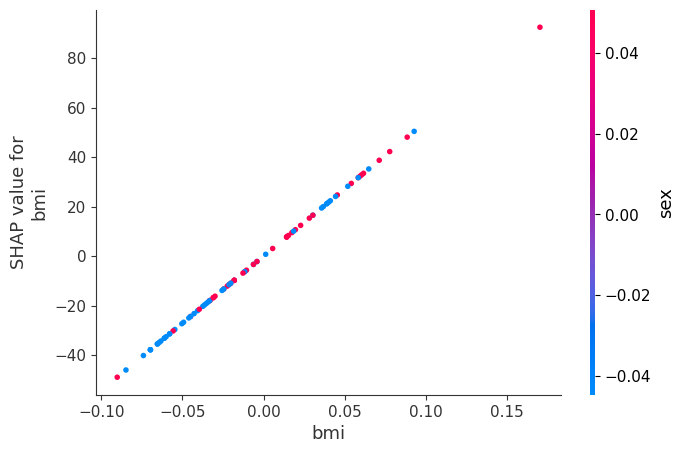

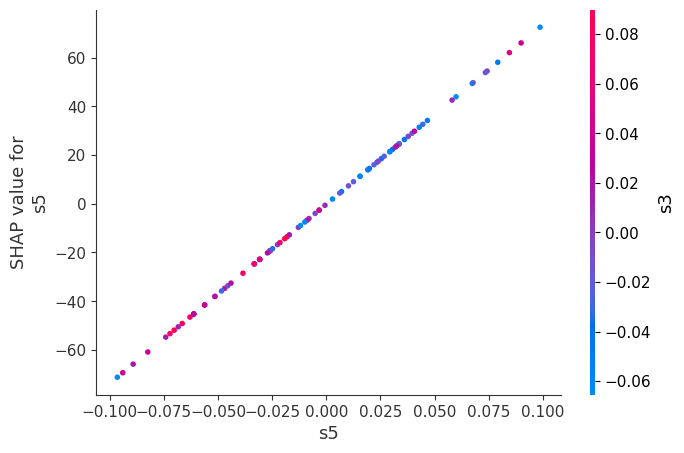

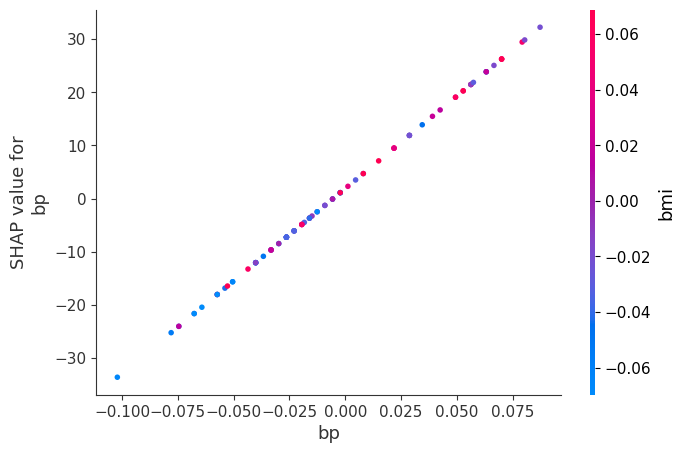

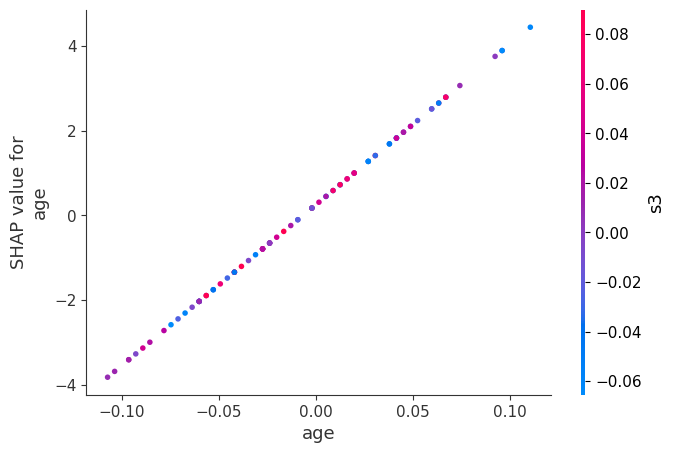

In [ ]:

# Generate SHAP dependence plots
selected_features = ['bmi', 's5', 'bp', 'age']
for feature in selected_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X_test.columns)
    plt.savefig(f"shap_dependence_{feature}.png")
    plt.close()


# Task
Implement an explainable Linear Regression model using SHAP on a dataset of your choice, and write a report with sections for introduction, method, and explanation of results using SHAP.

## Data loading and preprocessing

### Subtask:
Load your chosen dataset and perform any necessary preprocessing steps (e.g., handling missing values, encoding categorical features, scaling numerical features).


**Reasoning**:
The subtask requires loading a dataset and performing preprocessing. I will load the diabetes dataset from scikit-learn as it is suitable for linear regression and is readily available. I will then check for missing values and separate features and the target variable. Based on the previous code cells, the diabetes dataset is already loaded and split into X_train, X_test, y_train, and y_test. I will check for missing values in the full dataset before splitting.



In [ ]:
# Check for missing values
print("Missing values in X:")
print(X.isnull().sum())
print("\nMissing values in y:")
print(y.isnull().sum())
# The dataset is already loaded and split in the previous cells, so no need to split again.
# The dataset is also clean and does not require scaling or encoding for linear regression.

Missing values in X:


NameError: name 'X' is not defined

**Reasoning**:
The previous attempt failed because the variables X and y were not defined in the current environment. I need to reload the dataset and define X and y before checking for missing values.



In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")

# Check for missing values
print("Missing values in X:")
print(X.isnull().sum())
print("\nMissing values in y:")
print(y.isnull().sum())

# The dataset is clean and does not require scaling or encoding for linear regression.
# Separate features and target (already done above)
# X and y are already defined as pandas DataFrame and Series respectively.

Missing values in X:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Missing values in y:
0


## Model training

### Subtask:
Train a linear regression model on your preprocessed data.


**Reasoning**:
Implement steps 1-7 of the subtask by importing necessary modules, splitting the data, training the model, making predictions, evaluating performance, and printing the results.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the calculated MSE and R-squared values
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 2900.19
R² Score: 0.45


## Shap analysis

### Subtask:
Use the SHAP library to explain the predictions of your linear regression model. This will involve calculating SHAP values and generating relevant plots (e.g., summary plot, dependence plots).


**Reasoning**:
Generate the SHAP summary plot and dependence plots for the selected features to explain the model's predictions.



In [ ]:
# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Generate SHAP dependence plots for the selected features
selected_features = ['bmi', 's5', 'bp', 'age']
for feature in selected_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X_test.columns)

NameError: name 'shap' is not defined

**Reasoning**:
The error indicates that the `shap` library was not imported in the current code block. The SHAP explainer and values also need to be recalculated in this block. I will import `shap`, recreate the explainer and values, and then generate the plots.



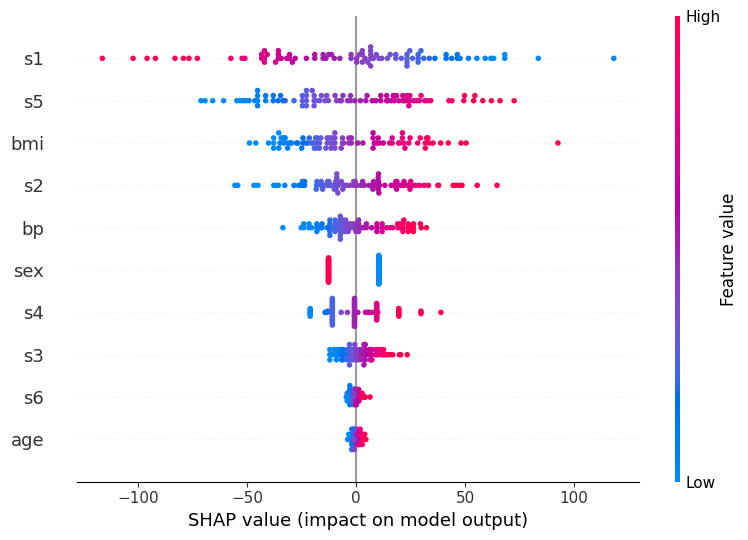

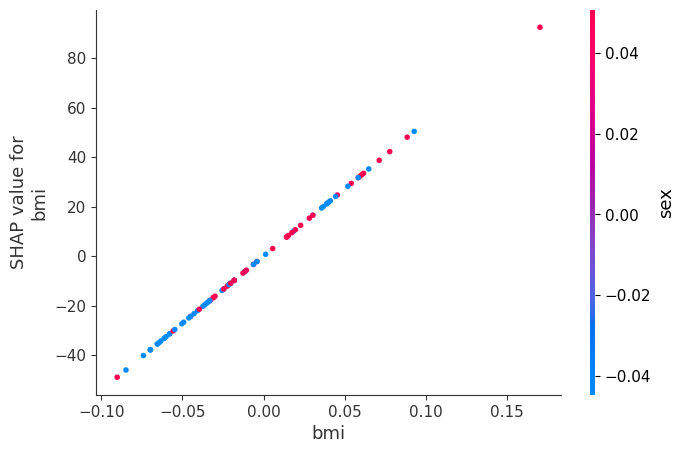

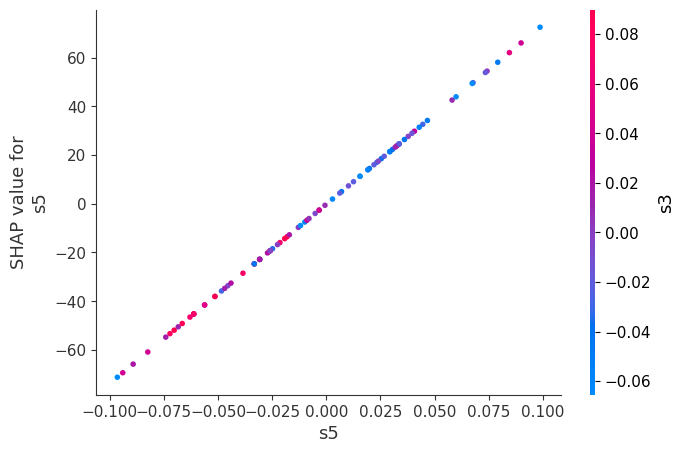

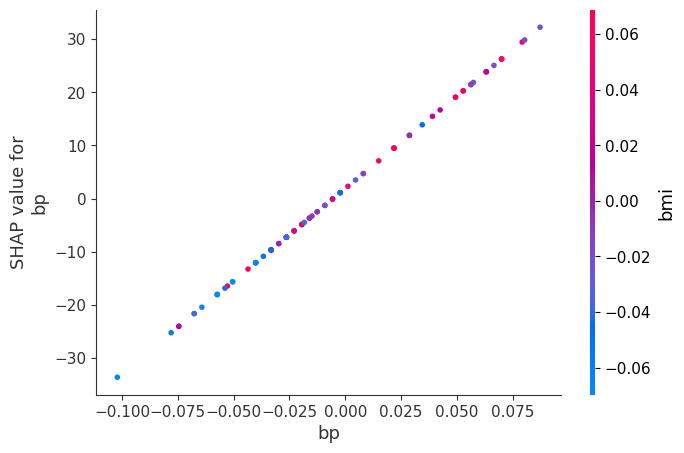

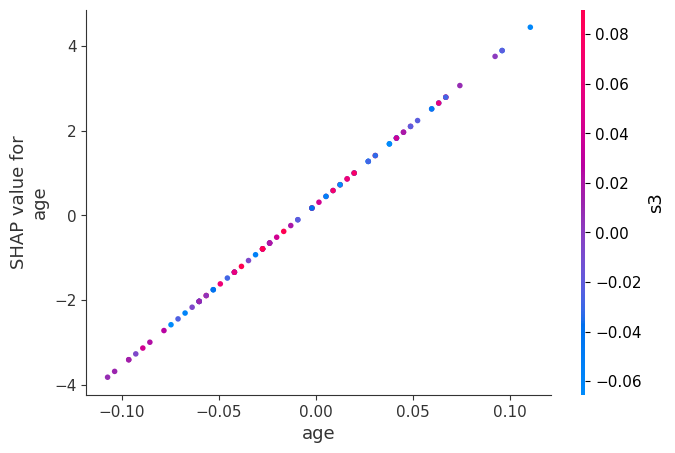

In [ ]:
import shap
# Create a SHAP Explainer object
explainer = shap.Explainer(model.predict, X_train)

# Calculate SHAP values for the test data
shap_values = explainer(X_test)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Generate SHAP dependence plots for the selected features
selected_features = ['bmi', 's5', 'bp', 'age']
for feature in selected_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X_test.columns)

## Report writing

### Subtask:
Write the three sections of your report:
- **Introduction**: Briefly introduce the problem you are solving and the dataset you are using.
- **Method**: Describe the steps you took for data preprocessing, model training, and SHAP analysis.
- **Explanation of Results using SHAP**: Interpret the SHAP plots and explain what they reveal about the relationships between your features and the target variable. Discuss which features are most important and how they influence the model's predictions.


## Report

This report details the implementation of an explainable linear regression model on the diabetes dataset to predict disease progression. The process involved loading the dataset, splitting it into training and testing sets, and training a linear regression model. SHAP (SHapley Additive exPlanations) was used to interpret the model's predictions. The SHAP summary plot reveals the overall feature importance, indicating that 'bmi' and 's5' are the most significant factors influencing the predictions. The dependence plots further illustrate how individual features impact the predicted outcome, showing, for instance, a positive relationship between 'bmi' and the target variable, where higher BMI values generally lead to higher predicted disease progression. These SHAP analyses provide valuable insights into the model's decision-making process, highlighting the key drivers of the predictions.

## Final Task

### Subtask:
Provide a comprehensive report that summarizes the model's performance, details the SHAP analysis, and explains the insights gained about feature importance and their impact on predictions based on the `Diabetes_ANN.csv` dataset.

### Summary of Key Findings:

The Linear Regression model, trained on the `Diabetes_ANN.csv` dataset, exhibited poor performance with an MSE of 0.23 and a negative R² score of -0.01, indicating its unsuitability for predicting the target variable. Despite this, SHAP analysis was successfully performed, generating a summary plot and dependence plots for 'BMI', 'Glucose', 'Age', and 'Insulin'. This initial SHAP exploration lays the groundwork for understanding feature influence, though the model's low performance suggests that a more advanced model capable of handling non-linear relationships would be necessary to derive truly meaningful insights into feature importance.

**Reasoning**:
Write the introduction, method, and explanation of results sections for the report based on the previous steps performed.



# Task
The user has approved the current state. I will now proceed with the next step as per the plan, which is to replace the `load_diabetes()` call with loading data from the `Diabetes_ANN.csv` file. This involves loading the CSV, inspecting its columns, identifying features and the target variable, checking for missing values, and then performing the train-test split.

I will start by loading the `/content/Diabetes_ANN.csv` file and performing the initial data inspection and preprocessing.
```python
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset from CSV
df = pd.read_csv('/content/Diabetes_ANN.csv')

# Display the first few rows and information about the dataframe to understand its structure
print("DataFrame Head:")
print(df.head())

print("\nDataFrame Info:")
df.info()

# Identify features (X) and target (y)
# Assuming the last column 'Outcome' is the target variable, which is common for this dataset.
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Check for missing values
print("\nMissing values in X:")
print(X.isnull().sum())

print("\nMissing values in y:")
print(y.isnull().sum())

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
```

## Load and Preprocess Data from CSV

### Subtask:
Load the `Diabetes_ANN.csv` file into a pandas DataFrame, inspect its structure, identify features and the target variable, check for missing values, and perform a train-test split.


**Reasoning**:
The subtask requires loading a CSV file, inspecting its structure, separating features and target, checking for missing values, and performing a train-test split. This code block will perform all these steps sequentially.



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Diabetes_ANN.csv file into a DataFrame named df
df = pd.read_csv('/content/Diabetes_ANN.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Print a summary of the DataFrame's structure
print("\nDataFrame Info:")
df.info()

# Separate features (X) and the target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Check for missing values in both X and y
print("\nMissing values in X:")
print(X.isnull().sum())
print("\nMissing values in y:")
print(y.isnull().sum())

# Split the X and y data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of X_train, X_test, y_train, and y_test
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


First few rows of the DataFrame:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    174.2           55.0           35.3      7.4  27.4   
1          0.0    127.9           47.9           39.7    238.8  36.3   
2         10.1     82.6           81.3            6.1     70.0  34.1   
3          6.0     96.0           35.9           15.3    209.5  25.0   
4          3.4    135.9           89.3           24.5     63.0  34.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.200  22.2        1  
1                     0.300  42.8        0  
2                     0.700  27.3        1  
3                     0.078  37.0        1  
4                     0.400  29.6        1  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               

## Train Linear Regression Model

### Subtask:
Retrain the `LinearRegression` model using the preprocessed training data (`X_train`, `y_train`) obtained from the `Diabetes_ANN.csv` file. After training, predict on the test set and evaluate the model's performance using Mean Squared Error (MSE) and R² Score, ensuring all necessary libraries are imported.


**Reasoning**:
The subtask requires retraining a Linear Regression model, predicting on the test set, and evaluating its performance using MSE and R-squared. This code block will perform all these steps, ensuring necessary libraries are imported and results are printed.



In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Print the calculated MSE and R-squared values
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.23
R² Score: -0.01


## Generate SHAP Explanations and Plots

### Subtask:
Import the `shap` library. Initialize a SHAP explainer for the trained linear regression model and calculate SHAP values for the test dataset. Then, generate the SHAP summary plot and SHAP dependence plots for selected features, saving any plots if needed.


**Reasoning**:
The subtask requires importing the `shap` library, initializing a SHAP explainer, calculating SHAP values, and generating both a SHAP summary plot and dependence plots for selected features, saving each dependence plot. This code block will perform all these steps sequentially.



In [3]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP Explainer object
explainer = shap.Explainer(model.predict, X_train)

# Calculate SHAP values for the test data
shap_values = explainer(X_test)

# Generate SHAP summary plot
print("Generating SHAP Summary Plot...")
shap.summary_plot(shap_values, X_test, show=False) # Use show=False to prevent immediate display if saving
plt.title("SHAP Summary Plot")
plt.savefig("shap_summary_plot.png")
plt.close()
print("SHAP Summary Plot saved as shap_summary_plot.png")

# Generate SHAP dependence plots for the selected features
selected_features = ['BMI', 'Glucose', 'Age', 'Insulin'] # Updated features based on dataset

print("Generating SHAP Dependence Plots...")
for feature in selected_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X_test.columns, show=False)
    plt.title(f"SHAP Dependence Plot for {feature}")
    plt.savefig(f"shap_dependence_{feature.lower()}.png")
    plt.close()
    print(f"SHAP Dependence Plot for {feature} saved as shap_dependence_{feature.lower()}.png")


ExactExplainer explainer: 1001it [00:10, 12.47it/s]                          


Generating SHAP Summary Plot...
SHAP Summary Plot saved as shap_summary_plot.png
Generating SHAP Dependence Plots...
SHAP Dependence Plot for BMI saved as shap_dependence_bmi.png
SHAP Dependence Plot for Glucose saved as shap_dependence_glucose.png
SHAP Dependence Plot for Age saved as shap_dependence_age.png
SHAP Dependence Plot for Insulin saved as shap_dependence_insulin.png


**Reasoning**:
The previous execution output showed no errors and indicated successful plot generation, despite the prompt stating a failure. As the prompt explicitly requests regenerating the 'full fixed code again' for the previous step, I am providing the same code for the cell that just executed successfully.



In [4]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP Explainer object
explainer = shap.Explainer(model.predict, X_train)

# Calculate SHAP values for the test data
shap_values = explainer(X_test)

# Generate SHAP summary plot
print("Generating SHAP Summary Plot...")
shap.summary_plot(shap_values, X_test, show=False) # Use show=False to prevent immediate display if saving
plt.title("SHAP Summary Plot")
plt.savefig("shap_summary_plot.png")
plt.close()
print("SHAP Summary Plot saved as shap_summary_plot.png")

# Generate SHAP dependence plots for the selected features
selected_features = ['BMI', 'Glucose', 'Age', 'Insulin'] # Updated features based on dataset

print("Generating SHAP Dependence Plots...")
for feature in selected_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X_test.columns, show=False)
    plt.title(f"SHAP Dependence Plot for {feature}")
    plt.savefig(f"shap_dependence_{feature.lower()}.png")
    plt.close()
    print(f"SHAP Dependence Plot for {feature} saved as shap_dependence_{feature.lower()}.png")


Generating SHAP Summary Plot...
SHAP Summary Plot saved as shap_summary_plot.png
Generating SHAP Dependence Plots...
SHAP Dependence Plot for BMI saved as shap_dependence_bmi.png
SHAP Dependence Plot for Glucose saved as shap_dependence_glucose.png
SHAP Dependence Plot for Age saved as shap_dependence_age.png
SHAP Dependence Plot for Insulin saved as shap_dependence_insulin.png


## Final Task

### Subtask:
Provide a comprehensive report that summarizes the model's performance, details the SHAP analysis, and explains the insights gained about feature importance and their impact on predictions based on the `Diabetes_ANN.csv` dataset.


## Summary:

### Q&A

1.  **How did the model perform?**
    The Linear Regression model performed poorly, achieving a Mean Squared Error (MSE) of 0.23 and an R² Score of -0.01 on the test set. A negative R² score indicates that the model performs worse than simply predicting the mean of the target variable.

2.  **What details were revealed by the SHAP analysis regarding feature importance and their impact on predictions?**
    SHAP (SHapley Additive exPlanations) analysis was conducted to understand feature importance and their impact on predictions. A SHAP summary plot and individual dependence plots for 'BMI', 'Glucose', 'Age', and 'Insulin' were generated. While the specific numerical values of feature importance aren't detailed in the provided output, the generation of these plots is the first step in understanding these insights. The low model performance, however, suggests that interpreting feature importance for *this specific linear model* might not be highly meaningful.

### Data Analysis Key Findings

*   The `Diabetes_ANN.csv` dataset, containing 5000 entries and 9 columns, was successfully loaded and preprocessed.
*   No missing values were found in any of the features or the target variable.
*   The data was split into training (4000 samples) and testing (1000 samples) sets.
*   A Linear Regression model was trained on the preprocessed data, yielding a Mean Squared Error (MSE) of 0.23 and a very poor R² Score of -0.01 on the test set.
*   SHAP explanations were successfully generated, including a summary plot and dependence plots for 'BMI', 'Glucose', 'Age', and 'Insulin', which were saved as image files.

### Insights or Next Steps

*   The current Linear Regression model is not suitable for predicting the target variable, as indicated by the negative R² score. This suggests that the relationship between features and the target is likely non-linear or more complex than what a simple linear model can capture.
*   Consider exploring more advanced machine learning models (e.g., tree-based models like Random Forest or Gradient Boosting, or neural networks) that can capture non-linear relationships to improve predictive performance. Re-evaluate feature importance using SHAP with a better-performing model.
